# Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Changing fonts
rc = {"font.family" : "serif",
      "mathtext.fontset" : "cm"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]

# I- and i'-band transmission curves

The I-band and i'-band transmission curves are extracted from the official website of **Canada France Hawaii Telescope (CFHT)**—[click here to go to their website](https://www.cfht.hawaii.edu/Instruments/). 

## I-band transmission curve

The **I-band** is a part of the now **decommissioned** camera, **CFH12K**. The transmission curve of I-band can be obtained from [this link](https://www.cfht.hawaii.edu/Instruments/Filters/cfh12k.html) in the `Mould I` row and `Filter Number and ASCII data` column.

In [3]:
I_band = np.loadtxt("CFH12K_mould_I.txt")
I_wavelength = I_band[:, 0]  # Wavelength in Angstroms
I_transmission = I_band[:, 1]  # Transmission values

print(f"Wavelength array shape: {I_wavelength.shape}")
print(f"Transmission array shape: {I_transmission.shape}")
print(f"Wavelength range: {I_wavelength.min()} to {I_wavelength.max()}")
print(f"Transmission range: {I_transmission.min()} to {I_transmission.max()}")

del I_band

Wavelength array shape: (319,)
Transmission array shape: (319,)
Wavelength range: 502.0 to 1138.0
Transmission range: -0.078 to 91.307


## i'-band transmission curve

The **i'-band** (referred to as `i-band` in the final data release paper of VVDS team) is a part of the **MegaPrime/MegaCam** of CFHT. The transmission curve of i'-band can be obtained from [this link](https://www.cfht.hawaii.edu/Instruments/Filters/megaprime.html) in the `i'` row and `Filter Number and ASCII Data` column. Inside the file, there are many nearly identical transmission curves, we choose only the first column of transmission values inside the `.txt` file.

In [4]:
i_band = np.loadtxt("MegaCam_i_band.txt", delimiter = ",", usecols = (0, 1))
i_wavelength = i_band[:, 0]  # Wavelength in Angstroms
i_transmission = i_band[:, 1]  # Transmission values

print(f"MegaCam i-band wavelength array shape: {i_wavelength.shape}")
print(f"MegaCam i-band transmission array shape: {i_transmission.shape}")
print(f"MegaCam i-band wavelength range: {i_wavelength.min()} to {i_wavelength.max()}")
print(f"MegaCam i-band transmission range: {i_transmission.min()} to {i_transmission.max()}")

del i_band

MegaCam i-band wavelength array shape: (4518,)
MegaCam i-band transmission array shape: (4518,)
MegaCam i-band wavelength range: 680.05 to 873.423
MegaCam i-band transmission range: 0.124496087 to 99.20258049


## Comparing the curves

In the graph below, we show the transmission curves of the I-band from the decommissioned CFH12K camera and i'-band from the MegaCam, both are from the CFHT.

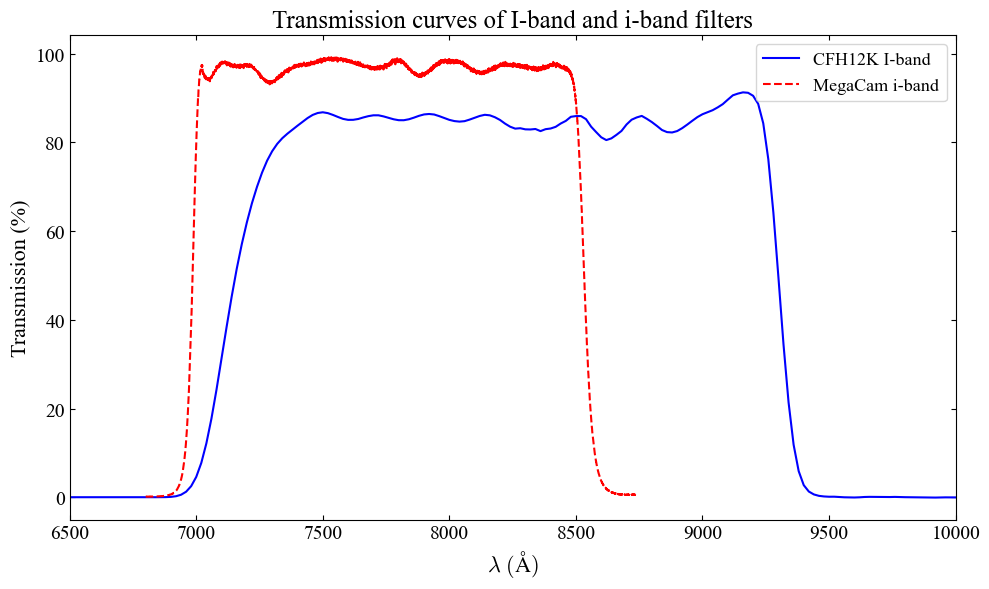

In [6]:
fig, ax = plt.subplots(figsize = (10, 6))

ax.plot(I_wavelength * 10, I_transmission, label='CFH12K I-band', color='blue')
ax.plot(i_wavelength * 10, i_transmission, label='MegaCam i-band', color='red', linestyle='--')

ax.set_xlim(6500, 10000)
ax.set_xlabel(r'$\lambda\;(\mathrm{\AA})$', fontsize=16)
ax.set_ylabel('Transmission (%)', fontsize=16)
ax.set_title('Transmission curves of I-band and i-band filters', fontsize = 18)

ax.legend(fontsize = 13, loc = 'upper right')

ax.tick_params(direction='in', which='both', top=True, right=True, labelsize=14)
plt.tight_layout()

plt.savefig('transmission_curves.png', dpi=300)